# Exercises 3

*Antti Härkönen*

## 1.

a)

b)

## 2.


## 3.

## 4.

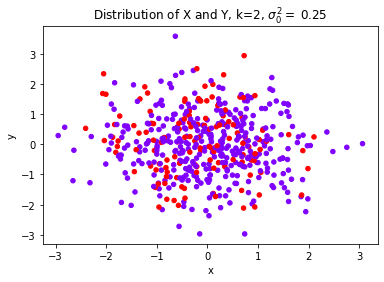

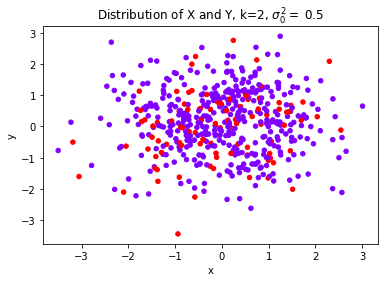

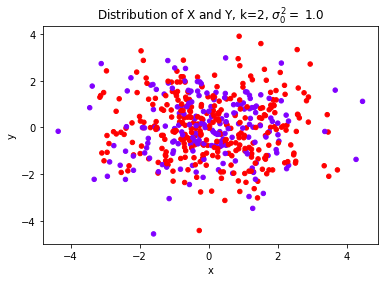

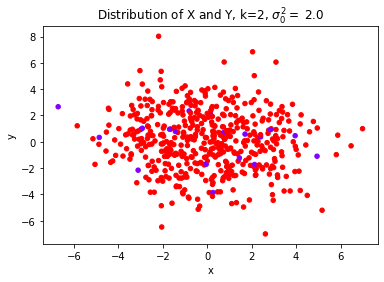

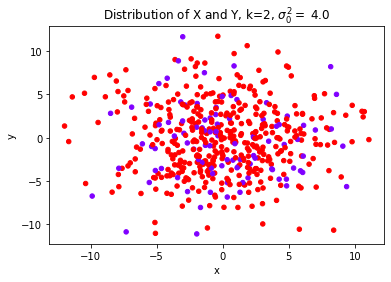

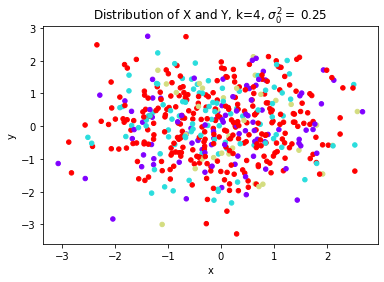

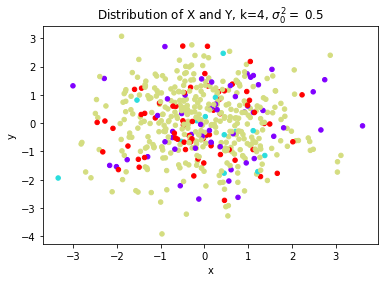

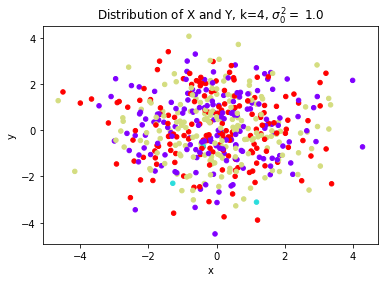

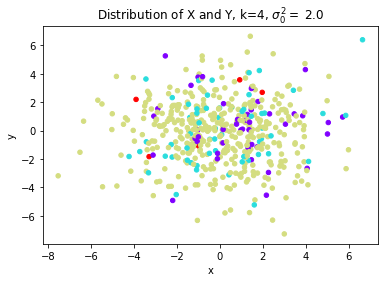

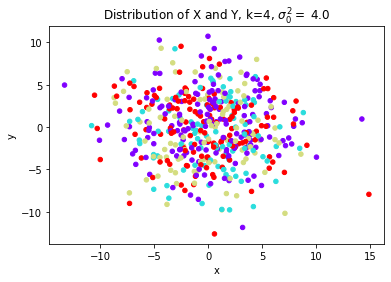

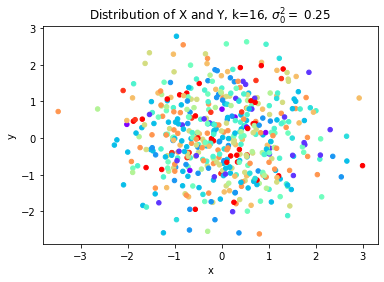

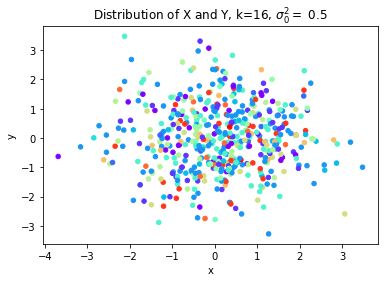

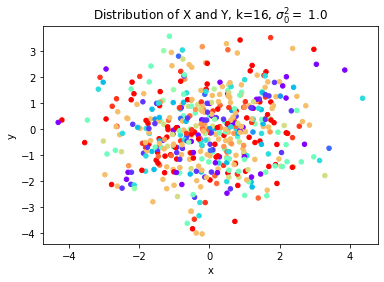

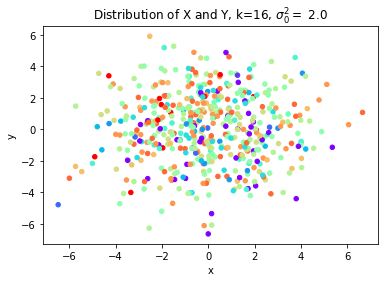

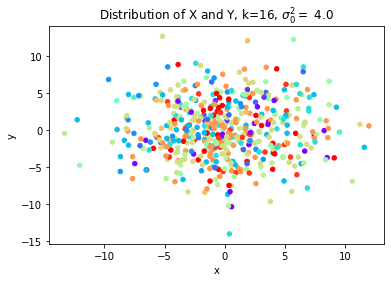

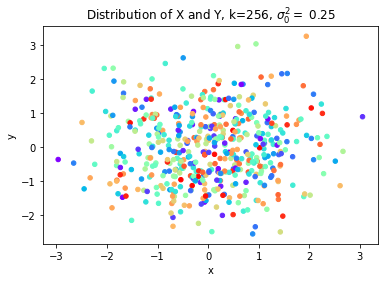

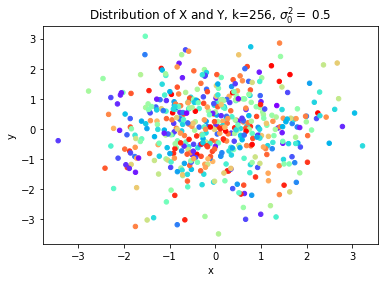

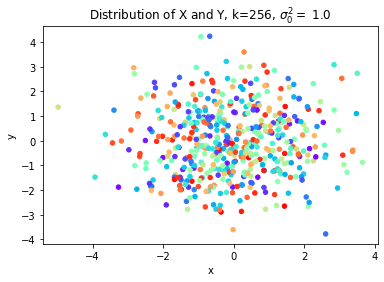

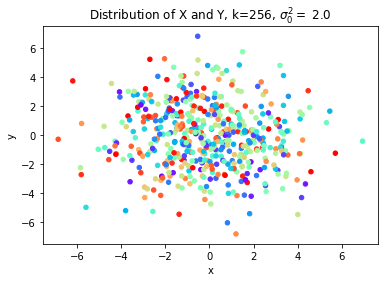

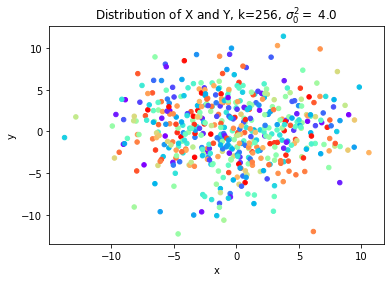